In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd


In [74]:
cancer = pd.read_csv('data.csv')

In [75]:
cancer.Diagnosis.value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

In [76]:
def encode_Diagnosis(x):
  if x == "B":
    return 0
  elif x == "M":
    return 1
cancer["encode_Diagnosis"] = cancer.apply(lambda x: encode_Diagnosis(x["Diagnosis"]),axis=1)

In [77]:
y = cancer[['encode_Diagnosis']]
x = cancer.drop(columns=['Diagnosis','encode_Diagnosis','ID',], axis=1)

In [78]:
cv = KFold(n_splits=10, random_state=49, shuffle=True)
print(cv)

KFold(n_splits=10, random_state=49, shuffle=True)


In [79]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [91]:
accuracy_scores = cross_val_score(tree, x, y, scoring='accuracy',cv=cv,).mean()
precision_scores = cross_val_score(tree, x, y, scoring='precision',cv=cv,).mean()
recall_scores = cross_val_score(tree, x, y, scoring='recall',cv=cv,).mean()
f1_scores = cross_val_score(tree, x, y, scoring='f1',cv=cv,).mean()

In [81]:
print("DecisionTree Accuracy:",accuracy_scores)
print("DecisionTree Precision:",precision_scores)
print("DecisionTree Recall:",recall_scores)
print("DecisionTree F1-score:",f1_scores)

DecisionTree Accuracy: 0.906954887218045
DecisionTree Precision: 0.8830809254957861
DecisionTree Recall: 0.8778732266596716
DecisionTree F1-score: 0.8751079326855395


In [85]:
predictions = cross_val_predict(tree,x,y,cv=cv)
y_score = cross_val_predict(tree, x, y, cv=cv, method='predict')

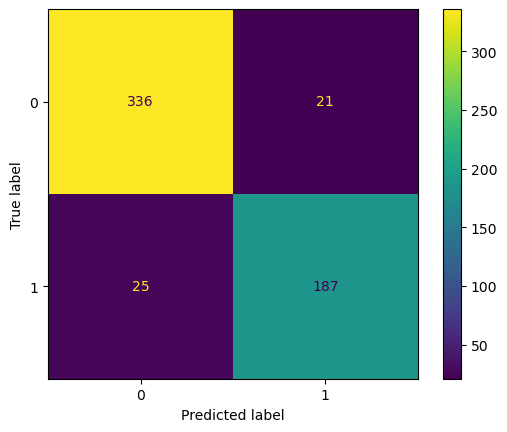

In [87]:

cm = confusion_matrix(y, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [92]:
false_positive_rate, true_positive_rate, threshold1 = roc_curve(y, y_score)
print('roc_auc_score  DecisionTree: ', roc_auc_score(y, y_score))

roc_auc_score  DecisionTree:  0.9116259711431742


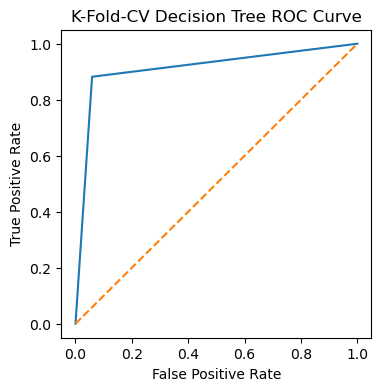

In [90]:
plt.subplots(1, figsize=(4,4))
plt.title('K-Fold-CV Decision Tree ROC Curve')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()